In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# library to visualize text data
from wordcloud import WordCloud
#a collection of words that don’t provide any meaning to a sentence
from nltk.corpus import stopwords
#used to convert different forms of words into a single item but still keeping the context intact.
from nltk.stem import WordNetLemmatizer

# transform text to vectors
from sklearn.feature_extraction.text import CountVectorizer
# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# machine learning algorithm for classification
from sklearn.ensemble import RandomForestClassifier

# no. of correctly classified instances/total no. of instances
from sklearn.metrics import accuracy_score
# ratio of no. of correctly predicted instances to the total predicted instance
from sklearn.metrics import precision_score
# ratio of no. of correctly predicted instances to the total instances
from sklearn.metrics import recall_score
# curve drawn between true positive rate vs false positive rate
from sklearn.metrics import roc_curve
#  report of precision, recall and f1 score
from sklearn.metrics import classification_report
# a table used to describe the classification models
from sklearn.metrics import confusion_matrix



In [2]:
# !pip install wordcloud

In [3]:
df_train= pd.read_csv(r"D:\Datasets\Sentiment Analysis\train.txt", delimiter= ';', names=['text', 'emotions'])
df_val= pd.read_csv(r"D:\Datasets\Sentiment Analysis\val.txt", delimiter= ';', names=['text', 'emotions'])
df_test= pd.read_csv(r"D:\Datasets\Sentiment Analysis\test.txt", delimiter= ';', names=['text', 'emotions'])


In [4]:
df_train.head()

,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df_train.shape, df_val.shape

((16000, 2), (2000, 2))

In [6]:
df_val.head()

,text,emotions
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [7]:
# concatenate train and val. As, we already have a test dataset for us and as we are going to 
# do cross validation on or dataset

df= pd.concat([df_train, df_val])
# reset the index to avoid duplicates of the index
df.reset_index(inplace= True, drop= True)

In [8]:
df.sample(5)

,text,emotions
8613,i feel reluctant to supply this motion picture...,fear
4016,i feel funny about mothers day,surprise
13522,i feel like an awful lot has happened in the p...,sadness
7308,i feel she was wronged,anger
14868,i feel lost and discombobulated i lose the dri...,sadness


<Axes: xlabel='emotions', ylabel='count'>

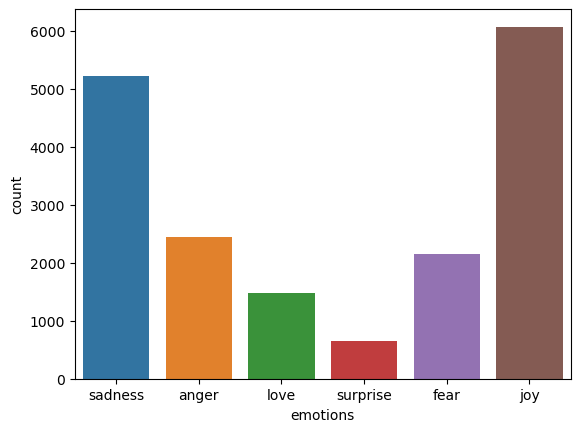

In [9]:
# check different target variables 
sns.countplot(data= df, x= 'emotions')

In [10]:
# create custom encoder to convert emotions into numerical format
def custom_encoder(df):
    
    df.replace(to_replace=['joy'], value= 1, inplace= True)
    df.replace(['surprise'], value= 1, inplace= True)
    df.replace(['love'], value= 1, inplace= True)
    df.replace(['sadness'], value= 0, inplace= True)
    df.replace(['anger'], value= 0, inplace= True)
    df.replace(['fear'], value= 0, inplace= True)
    
    return df

In [11]:
df= custom_encoder(df)

<Axes: xlabel='emotions', ylabel='count'>

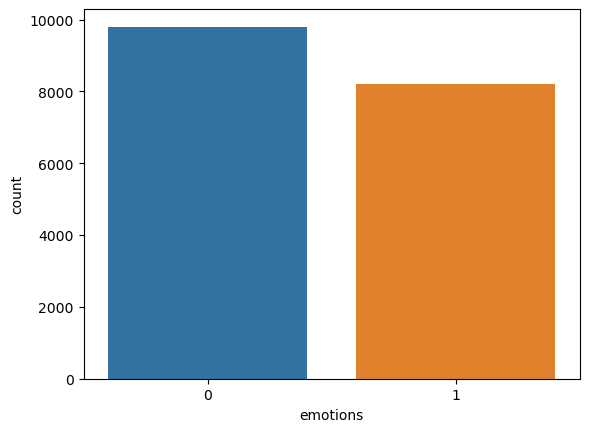

In [12]:
# check different target variables 
sns.countplot(data= df, x= 'emotions')

In [13]:
# we have changed the Emotions into Positive= 1 and Negative= 0, it shows that the data is 
# more or less is imbalanced

### Data Preprocessing

In [14]:
def text_preprocessing(df_col):
    
    corpus= []
    for i in df_col:
        
        # remove special characters, only keep the alphabets
        new_item= re.sub(pattern= '^[a-zA-Z]', repl=' ', string=str(i))
        # convert to lower case
        new_item = new_item.lower()
        # tokenization
        new_item= new_item.split()
        # perform lemmatization and remove the stop words
        lm= WordNetLemmatizer()
        new_item= [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        # join the words to form the corpus back
        corpus.append(' '.join(str(x) for x in new_item))
    
    return corpus
        

In [15]:
corpus= text_preprocessing(df_col= df['text'])

In [16]:
corpus[0:5]

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy']

#### Word Cloud:

It is a data visualization technique used to depict text in such a way that, the more frequent words appear enlarged as compared to less frequent words. This gives us a little insight into, how the data looks after being processed through all the steps until now.

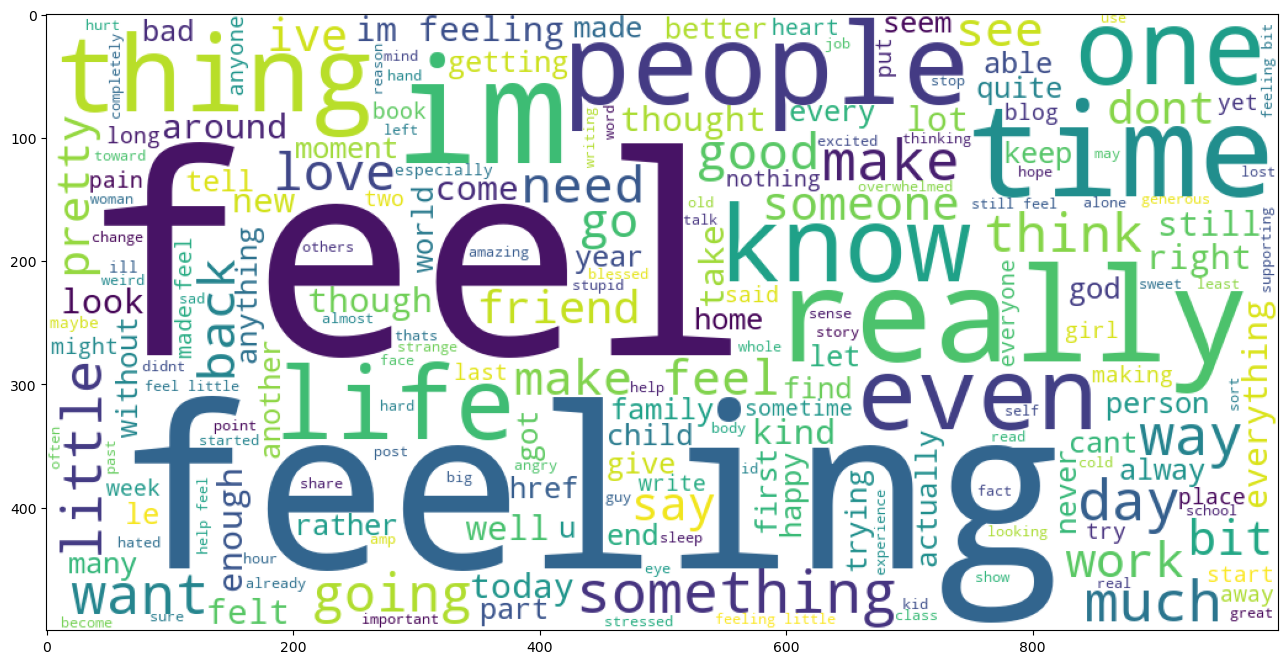

In [22]:
# Lets Visualize the preprocessed data using WordCloud
plt.figure(figsize=(20, 8))
word_cloud= ''
for row in corpus:
    for word in row:
        word_cloud+=' '.join(word)
#         print(cloud)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

### Bag Of Words (BOW):

Bag of Words Model(BOW), which is used to represent the text in the form of a bag of words,i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity,i.e. (the number of times a word occurs in a document) is the main point of concern.

Basically, it describes the total occurrence of words within a document.

In [25]:
# convert text data into vectors

cv= CountVectorizer(ngram_range= (1,2))  #ngram_range as (1,2) which signifies a bigram.
cv

CountVectorizer(ngram_range=(1, 2))

In [26]:
train_data= cv.fit_transform(corpus)
X= train_data
y= df['emotions']

### Random Forest Classifier


GridSearchCV() will take the following parameters,

1. Estimator or model – RandomForestClassifier in our case

2. parameters – dictionary of hyperparameter names and their values

3. cv – signifies cross-validation folds

4. return_train_score – returns the training scores of the various models

5. n_jobs – no. of jobs to run parallelly (“-1” signifies that all CPU cores will be used which reduces the training time drastically)

In [28]:
# create parameter dict to pass it to the Grid Search
parameters= {'max_features': ('auto', 'sqrt'),
            'n_estimators': [500, 1000, 1500],
            'max_depth': [5, 10, None],
            'min_samples_split': [5,10,15],
            'min_samples_leaf': [1, 2, 5, 10],
            'bootstrap': [True, False]}

In [ ]:
# fit the parameters in the grid search to get the best parameters

grid_search= GridSearchCV(RandomForestClassifier(), parameters, cv= 5, return_train_score= True, n_jobs= -1)
grid_search.fit(X,y)

grid_search.best_params_

In [ ]:
# can view all the models and their respective parameters, mean test score and rank 

for i in range(432):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])